In [68]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [69]:
def sp_wz_1(workdir):
    POS = workdir + "/POSCAR"
    OUT = workdir + "/OUTCAR"
    POSIN = !head -5 "{POS##*/}" | tail -3
    INCIN = !grep DIPOL "{INC##*/}"
    OUTIN = !grep dipole "{OUT##*/}"

    vecs = np.array([[float(i) for i in j.split()] for j in POSIN])
    Ionic = np.array([float(i) for i in OUTIN[1].split()[4:7]])
    electric= np.array([float(i) for i in OUTIN[2].split()[5:8]])

    TotalDip = Ionic + electric
    TotalDipM = np.array(TotalDip)

    TotalDipM[2] = (TotalDip[2] + vecs[2][2]/2 + 0.01) % vecs[2][2] - vecs[2][2]/2 - 0.01
    TotalDipM[1] = (TotalDip[1] + vecs[1][1]/2) % vecs[1][1] - vecs[1][1]/2
    TotalDipM[0] = (TotalDip[0] - (TotalDip[1] - TotalDipM[1])/vecs[1][1]*vecs[2][1] + vecs[0][0]/2) % vecs[0][0] - vecs[0][0]/2
    return {'Ion':Ionic, 'Electronic':electric, 'Total':TotalDip, 'Mod':TotalDipM}
    
    print(vecs)
    print(DIPOL)
    np.savetxt(sys.stdout, TotalDipM, '%0.5f')

def sp_rs_1(workdir, spin=1, var=2):
    POS = workdir + "/POSCAR"
    INC = workdir + "/INCAR"
    OUT = workdir + "/OUTCAR"
    POSIN = !head -5 "{POS##*/}" | tail -3
    INCIN = !grep DIPOL "{INC##*/}"
    OUTIN = !grep dipole "{OUT##*/}"

    vecs = np.array([[float(i) for i in j.split()] for j in POSIN])
    Ionic = np.array([float(i) for i in OUTIN[1].split()[4:7]])
    electric= np.array([float(i) for i in OUTIN[1+spin].split()[5:8]])

    TotalDip = Ionic + electric
    TotalDipM = np.array(TotalDip)

    dip = vecs[2][1]
    TotalDipM[2] = (TotalDip[2] + var + 0.01) % (dip*2) - var - 0.01
    TotalDipM[1] = (TotalDip[1] + var + 0.01) % (dip*2) - var - 0.01
    TotalDipM[0] = (TotalDip[0] + var + 0.01) % (dip*2) - var - 0.01
    return {'Ion':Ionic, 'Electronic':electric, 'Total':TotalDip, 'Mod':TotalDipM}
    
    print(vecs)
    print(DIPOL)
    np.savetxt(sys.stdout, TotalDipM, '%0.5f')


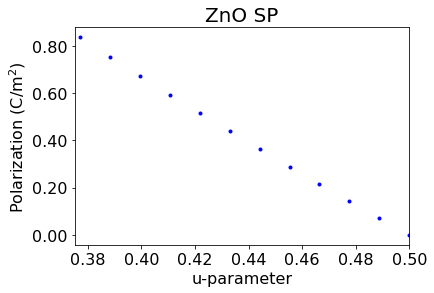

In [70]:
path = "/home/nadamski/SP/ZnO_sp/ZnO_sp/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]

    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.2446883970770823/2.8191824213275716/3.2553111805886981 * 1e20
tf = (tf % 5.2446883970770823)
P_ZnO = cf*tf

u_wz_Zn = 0.5 - x * (0.123)/11
u_m_Zn = 1 - 2 * u_wz_Zn





fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(u_wz,P_ZnO,'b.')

plt.xlim([0.375, 0.5])
#plt.ylim([0, 1.4])

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


plt.xlabel('u-parameter', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title('ZnO SP', fontsize=20)
plt.savefig('ZnO.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [71]:
path = "/home/nadamski/SP/CaO_rs/PBE/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=1)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/120 + 0.3333333
cf = 16/2.4106540313390861**3/2
P_CaO = cf*tf
print(tf)

u_m_Ca = 3*x - 1

[-2.82325678e+00 -2.68704831e+00 -2.55198298e+00 -2.41910005e+00
 -2.28831289e+00 -2.15894601e+00 -2.02996690e+00 -1.90058271e+00
 -1.77019392e+00 -1.63845414e+00 -1.50493034e+00 -1.36925880e+00
 -1.23083330e+00 -1.08934207e+00 -9.44248174e-01 -7.95291804e-01
 -6.42386359e-01 -4.85739684e-01 -3.25871394e-01 -1.63578234e-01
 -3.35553984e-06]


In [72]:
path = "/home/nadamski/SP/MgO_rs/PBE/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=1)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/120 + 0.3333333
cf = 16/2.1226436813876024**3/2
P_MgO = cf*tf
print(tf)

u_m_Mg = 3*x - 1

[-2.49273650e+00 -2.36532684e+00 -2.23725900e+00 -2.10896600e+00
 -1.98072496e+00 -1.85284765e+00 -1.72548177e+00 -1.59876493e+00
 -1.47272359e+00 -1.34737508e+00 -1.22271938e+00 -1.09865258e+00
 -9.75174678e-01 -8.52181750e-01 -7.29656476e-01 -6.07477612e-01
 -4.85610517e-01 -3.63985909e-01 -2.42551827e-01 -1.21256309e-01
  4.56780734e-06]


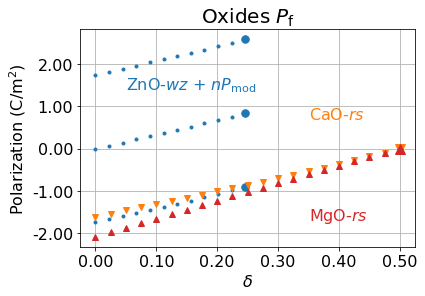

In [73]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)

P_mod = 16 / (3.2553**2*3**0.5/2)

plt.plot(u_m_Zn, P_ZnO, '.',color='C0')
plt.plot(u_m_Zn, P_ZnO+P_mod, '.',color='C0')
plt.plot(u_m_Zn, P_ZnO-P_mod, '.',color='C0')

plt.plot(u_m_Zn[-1], P_ZnO[-1], '.',color='C0',markersize=15)
plt.plot(u_m_Zn[-1], P_ZnO[-1]+P_mod, '.',color='C0',markersize=15)
plt.plot(u_m_Zn[-1], P_ZnO[-1]-P_mod, '.',color='C0',markersize=15)


plt.plot(u_m_Ca, P_CaO, 'v', color='C1')
plt.plot(u_m_Mg, P_MgO, '^', color='C3')

plt.plot(u_m_Ca[-1], P_CaO[-1], 'v', color='C1',markersize=10)
plt.plot(u_m_Mg[-1], P_MgO[-1], '^', color='C3',markersize=10)



ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.text(0.05, 1.40, r'ZnO-$wz$ + $nP_{\rmmod}$', color='C0', fontsize=16)
plt.text(0.35, 0.70, r'CaO-$rs$', color='C1', fontsize=16)
plt.text(0.35, -1.70, r'MgO-$rs$', color='C3', fontsize=16)

plt.grid(True)
plt.xlabel(r'$\delta$', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'Oxides $P_{\rm f}$', fontsize=20)
plt.savefig('Oxides.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

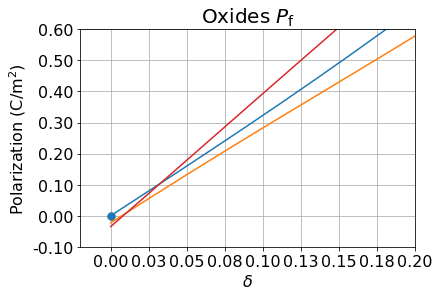

In [74]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)

P_mod_Ca = 16 / ((2.4106540313390861*2**0.5)**2*3**0.5/2)
P_mod_Mg = 16 / ((2.1226436813876024*2**0.5)**2*3**0.5/2)


plt.plot(u_m_Zn, P_ZnO,color='C0')

plt.plot(u_m_Zn[0], P_ZnO[0], '.',color='C0',markersize=15)


plt.plot(u_m_Ca, P_CaO+P_mod_Ca, color='C1')
plt.plot(u_m_Mg, P_MgO+P_mod_Mg, color='C3')

plt.xlim([-0.02, 0.2])
plt.ylim([-0.1, 0.6])


ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

#plt.text(0.05, 1.40, r'ZnO-$wz$', color='C0', fontsize=16)
#plt.text(0.35, 0.70, r'CaO-$rs$', color='C1', fontsize=16)
#plt.text(0.35, -1.70, r'MgO-$rs$', color='C3', fontsize=16)

plt.grid(True)
plt.xlabel(r'$\delta$', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'Oxides $P_{\rm f}$', fontsize=20)
plt.savefig('Oxides0.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [36]:
P_CaO+P_mod_Ca

array([-0.02265601,  0.05512785,  0.13225889,  0.20814364,  0.28283158,
        0.35670843,  0.43036385,  0.5042506 ,  0.57871104,  0.65394298,
        0.73019371,  0.80767094,  0.88672086,  0.96752151,  1.05037951,
        1.13544324,  1.22276214,  1.31221753,  1.40351267,  1.49619257,
        1.58960441])

In [37]:
P_MgO+P_mod_Mg

array([-0.03489711,  0.07167929,  0.17880625,  0.28612155,  0.3933934 ,
        0.50036098,  0.60690076,  0.71289763,  0.81832944,  0.92318173,
        1.02745448,  1.13123462,  1.23452216,  1.33740403,  1.43989471,
        1.54209563,  1.64403575,  1.74577303,  1.84735095,  1.94881296,
        2.05024599])

In [38]:
0.9996673007200834 - 0.6200226992799152

0.3796446014401682

In [39]:
1 - 2*0.3796446014401682

0.2407107971196636

In [40]:
1/3 + 0.2407107971196636 / 3

0.41357026570655453